# 相関係数と散布図

2変量データを扱う上で，基本的な扱いの一つが高校1年でも学習している散布図と相関係数であり，
散布図に関する分析につながる回帰直線を扱う．

## 散布図を描き相関係数を計算する

まずは使い方の例を一つ見る．




,x,y,z
x,1.000000,0.324375,0.152351
y,0.324375,1.000000,0.924131
z,0.152351,0.924131,1.000000


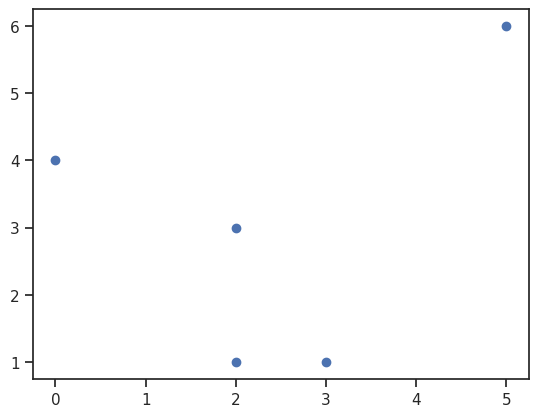

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# グラフの作成

# 基本的なデータ処理を行うためのライブラリ
# pdという名前の利用は習慣
# 統計処理が簡単になるようにサイズの同じベクトルを束ねるデータフレームを利用する
first = pd.DataFrame({
    # import文で定義した名前pdで参照している
    # コロン；の左の名前（クォートで囲むこと）に対して以降の値を与えている
    'x':  [2,2,0,3,5],
    'y':  [3,1,4,1,6],
    'z':  [5,1,5,2,6]})

# 散布図の描画，firstというデータフレームは上で定義した
fx = first[['x']]
fy = first[['y']]
fz = first[['z']]
# 横軸がｘ，縦軸がｙ
plt.scatter(fx, fy)
# 相関係数の計算
first.corr()





## 回帰直線を描く

単に回帰直線の計算をするだけであれば，次の式で求まるので，相関係数に比べてほとんど変わらない手間の計算に過ぎない．
$x=(x_1,\dots,x_n)$, $y=(y_1,\dots,y_n)$ に対して，
平均をそれぞれバーをつけて表すとき，
相関係数 $r$ は
$$
r = \frac{\sum_{k=1}^n (x_k-\bar{x})(y_k-\bar{y})}{\sqrt{\sum_{k=1}^n (x_k-\bar{x})^2}\sqrt{\sum_{k=1}^n (y_k-\bar{y})^2}}
$$
であり，
回帰直線
$$
y=a+bx
$$
は傾き$b$と切片$a$を
$$
b = \frac{\sum_{k=1}^n (x_k-\bar{x})(y_k-\bar{y})}{\sum_{k=1}^n (x_k-\bar{x})^2},\quad a=\bar{y}-b\bar{x}
$$
で計算できる．
回帰直線は，変数間の関係に非対称性があり，分母はｘだけであることに注意．

回帰直線の計算は直接に計算することも難しく内外，後日，機械学習を扱うので，機械学習ライブラリ scikit=learn を利用した．



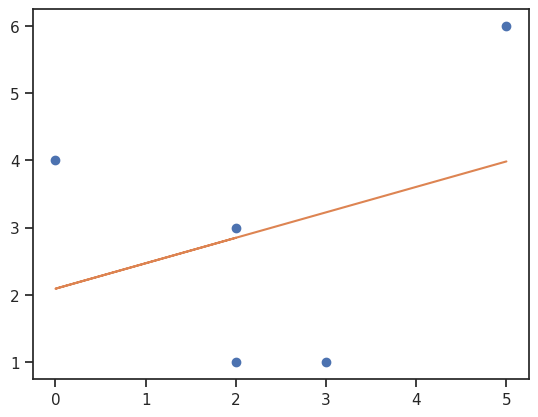

In [17]:
#
from sklearn.linear_model import LinearRegression
# 
model = LinearRegression()
model.fit(fx, fy)
plt.plot(fx, fy,'o')
plt.plot(fx,model.predict(fx))
plt.show()


## アンスコムの四重奏

相関係数および回帰直線は（ほぼ）同じでも，散布図に違いの見られる例．
データ入力の省略のため，有名な「アンスコムの四重奏」のデータをデータセットとして持っている seaborn ライブラリを利用した．

いずれのグラフとも，縦軸および横軸の目盛りは共通である．直線の傾き（相関係数と似た式の値）が同じに見えるだろうか．
回帰直線がそこそこ妥当と思えるのは I だけである．
この例が示すように相関係数などの数値だけでなく，データの図示を通じてデータの特徴をつかんでおくべきである．


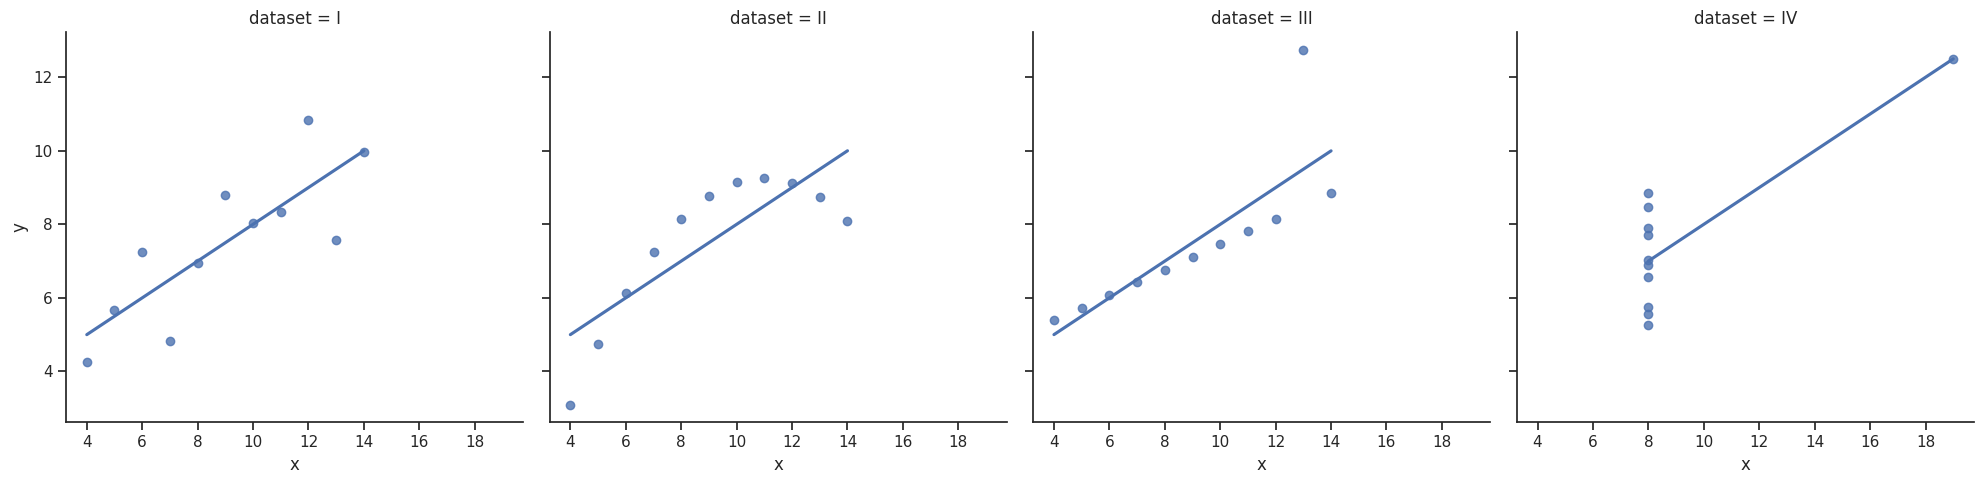

In [ ]:
# ライブラリ読み込み
import seaborn as sns

# スタイルを設定（この場合は目盛りを入れる設定）
sns.set_theme(style="ticks")

# seabornにデフォルトで用意されている「アンスコムの例」のデータを読み込む
df = sns.load_dataset("anscombe")

# 与えられたデータを元に回帰直線付きのプロット図を出力
# sns.lmplot(x="x", y="y", col="dataset", hue="dataset",
#           data=df, col_wrap=4, ci=None, palette="muted",
#           height=3, scatter_kws={"s": 30, "alpha": 1})

sns.lmplot(x="x", y="y", col="dataset", 
           data=df, col_wrap=4, ci=None
           )

## データファイルを読み込み利用する

ライブラリ pandas の関数Rread_csvおよびRread_excelを利用してファイルを読み込み，データフレームにして使う．

データファイルは，授業データサイエンスリテラシーの第4週で扱ったものから，数値でない列を除いたものである．
実行には，このデータファイルもGoogle Colabにアップロードしておくこと．Googleのマイドライブで適当なフォルダに置いた場合は，そのフォルダ名をファイル読み込みのパスに追加する．

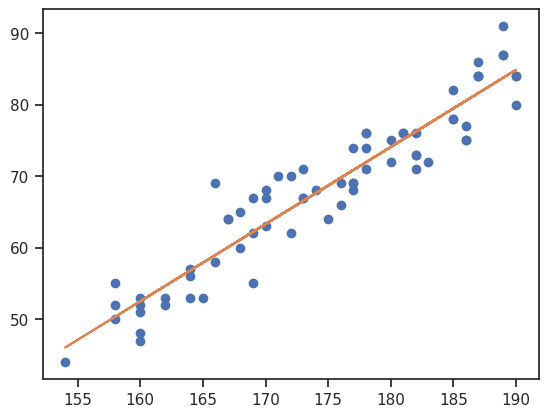

In [21]:
# undefinedなどのエラーが出たら最初のブロックのライブラリ読み込みをもう一度実行する
second = pd.read_csv('SCMEM20211018n.csv')
# Excelファイルの利用は次の行を利用
# second = pd.read_excel('SCMEM20211018n.xlsx', sheet_name=0)
# 散布図の描画
H = second[['Height']]
W = second[['Weight']]
A = second[['Age']]
# 横軸がｘ，縦軸がｙ
# plt.scatter(H, A)
# 相関係数の計算
# second.corr()
# 回帰直線の計算と図示
model = LinearRegression()
model.fit(H, W)
plt.plot(H, W,'o')
plt.plot(H,model.predict(H))
plt.show()
